# Exploratory Data Analysis on Bread_Basket dataset

In this notebook I performed an EDA on bread basket dataset and applied Apriori and FP growth algorithms for association rule mining. Association rule mining is a technique to identify underlying relations between different items. Ex: Movie streaming platforms like Netflix uses these kind of techniques to suggest you the movies based on your watch history. Different statistical algorithms have been developed to implement association rule mining, and Apriori and FP growth are one of those algorithms. Both of these algorithms are used to generate frequent itemsets based on the user transactions and later associations rules are derived from the frequent itemsets.

So, next time when you are seeing any sort of recommendations (or) on the internet, there could be a higher chances of involvement of these two algorithms.

Kaggle Dataset Link: https://www.kaggle.com/datasets/mittalvasu95/the-bread-basket


Without wasting more time, let's have a visit to our bakery.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('bread basket.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/the-bread-basket/bread basket.csv'

In [126]:
data

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
...,...,...,...,...,...
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend


In [127]:
data.dtypes

Transaction         int64
Item               object
date_time          object
period_day         object
weekday_weekend    object
dtype: object

In [128]:
data['date_time']=pd.to_datetime(data['date_time'])

C:\Users\Muhannad\AppData\Local\Temp\ipykernel_11380\1221971836.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['date_time']=pd.to_datetime(data['date_time'])


EDA on the dataset

In [129]:
data.isna().any()

Transaction        False
Item               False
date_time          False
period_day         False
weekday_weekend    False
dtype: bool

In [130]:
data['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [131]:
data.groupby(by='Transaction').get_group(67)

,Transaction,Item,date_time,period_day,weekday_weekend
140,67,Hearty & Seasonal,2016-10-30 13:46:00,afternoon,weekend
141,67,Mineral water,2016-10-30 13:46:00,afternoon,weekend
142,67,Muffin,2016-10-30 13:46:00,afternoon,weekend


In [132]:
data['period_day'].unique()

array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

In [133]:
data['weekday_weekend'].unique()

array(['weekend', 'weekday'], dtype=object)

In [134]:
data['Item'].unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

How was the sales b/w weekend vs weekday

In [135]:
weekday_weekend_count=data.groupby(by='weekday_weekend')['weekday_weekend'].count()
weekday_weekend_count

weekday_weekend
weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

<BarContainer object of 2 artists>

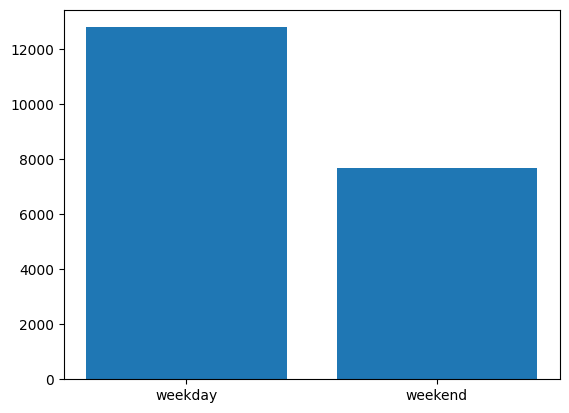

In [136]:
fig=plt.figure()
ax=fig.add_axes(111)
ax.bar(weekday_weekend_count.index,weekday_weekend_count)

That's amazing but let's findout why the weekend sales were lesser thans week day 

In [137]:
weekend_morning=data[(data['weekday_weekend']=='weekend') & (data['period_day']=='morning')]
weekend_afternoon=data[(data['weekday_weekend']=='weekend') & (data['period_day']=='afternoon')]
weekend_evening=data[(data['weekday_weekend']=='weekend') & (data['period_day']=='evening')]
weekend_night=data[(data['weekday_weekend']=='weekend') & (data['period_day']=='night')]

In [138]:
weekday_morning=data[(data['weekday_weekend']=='weekday') & (data['period_day']=='morning')]
weekday_afternoon=data[(data['weekday_weekend']=='weekday') & (data['period_day']=='afternoon')]
weekday_evening=data[(data['weekday_weekend']=='weekday') & (data['period_day']=='evening')]
weekday_night=data[(data['weekday_weekend']=='weekday') & (data['period_day']=='night')]

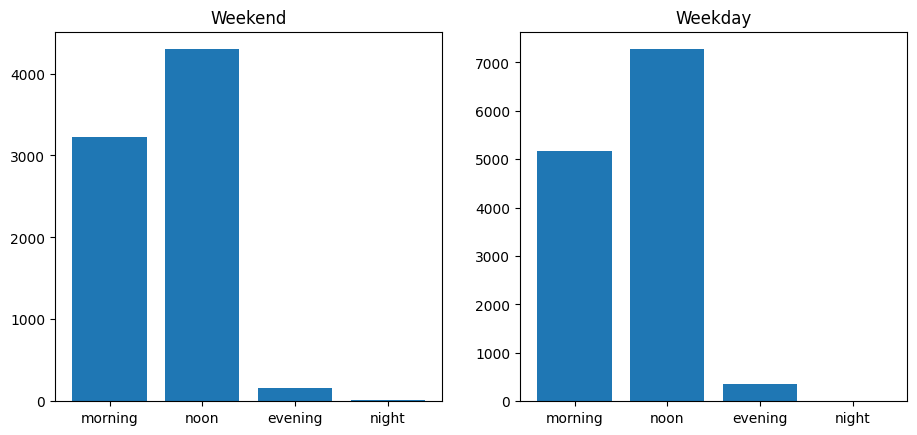

In [139]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].bar(['morning','noon','evening','night'],[len(weekend_morning),len(weekend_afternoon),len(weekend_evening),len(weekend_night)])
ax[0].set_title('Weekend')
ax[1].bar(['morning','noon','evening','night'],[len(weekday_morning),len(weekday_afternoon),len(weekday_evening),len(weekday_night)])
ax[1].set_title('Weekday')
fig.set_figwidth(11)

If we look at the above graph the trends are exactly same but the scale in no. of customers visiting the bakery varies.

Tips to improve:
1. Produce less amount of items in the weekend based on the demand
2. Sell unique items which will be made available only during the weekend
3. Give promos/discounts for the few products(can be found by frequent pattern algo's) only during the weekend

How was the month-wise sales in the bakery?

In [140]:
items_per_month=data.groupby(by=data['date_time'].dt.month)['Item'].count()

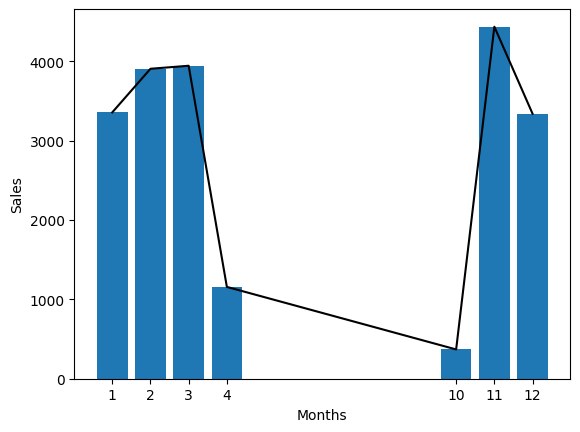

In [141]:
fig=plt.figure()
ax=fig.add_axes(111)
b=ax.bar(items_per_month.index,items_per_month)
ax.set_xticks(items_per_month.index)
ax.set_xlabel('Months')
ax.set_ylabel('Sales')
line=ax.plot(items_per_month,color='black')

The above barplot shows Bi-modal distribution as it has two peaks. In Bi-modal distribution, distribution of data will have two peaks seperated by a group in between them. Basically the two peaks might represent two seperate groups and it may require to be seperated using Gaussian mixture modeling (GMM) when we are attempting to create a model out of it.


From above plot we can infer that 'March' month has highest sales record and there is a sudden decrease in sales after March.

In [142]:
month_group=data.groupby(by=data['date_time'].dt.month)

In [143]:
march=month_group.get_group(3)

In [144]:
april=month_group.get_group(4)

Period wise comparison b/w March vs April

In [145]:
march_sales=march['period_day'].value_counts()

In [146]:
april_sales=april['period_day'].value_counts()

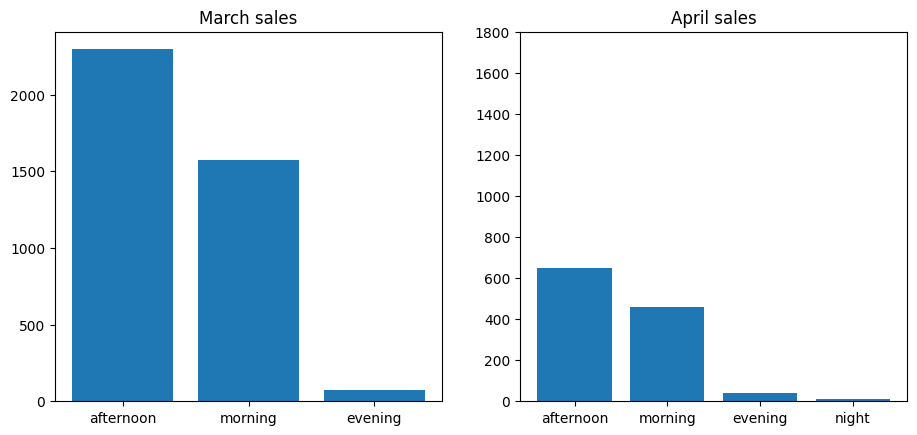

In [147]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].bar(march_sales.index,march_sales)
ax[0].set_title('March sales')
ax[1].bar(april_sales.index,april_sales)
ax[1].set_title('April sales')
ax[1].set_ylim(0,1800)
fig.set_figwidth(11)

Product wise commparison b/w March vs April

In [148]:
march_item_count=march['Item'].value_counts()
april_item_count=april['Item'].value_counts()

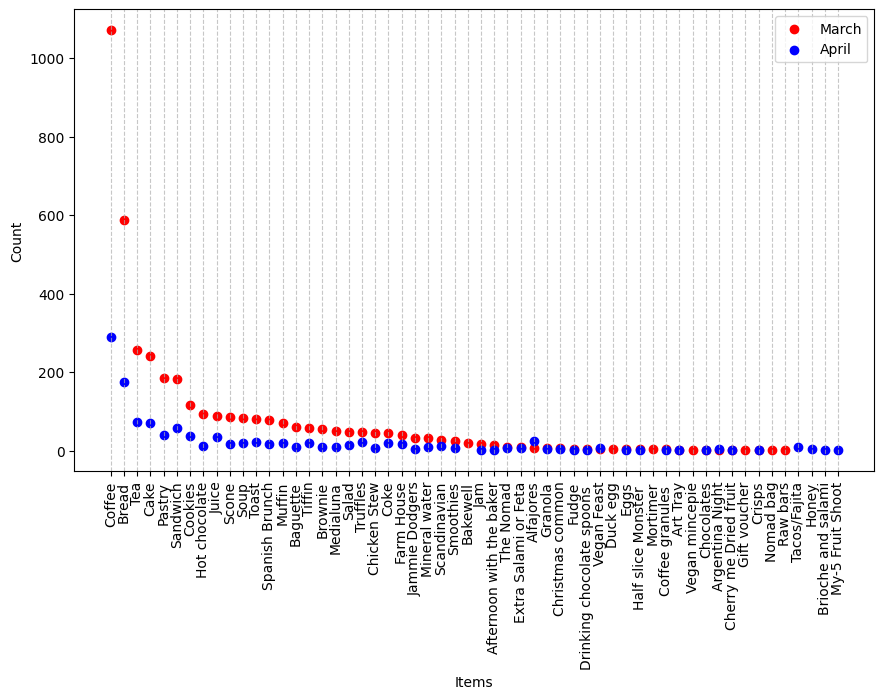

In [152]:

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed


ax.scatter(march_item_count.index, march_item_count, label='March', color='r')
ax.scatter(april_item_count.index, april_item_count, label='April', color='b')
ax.legend()
ax.grid(axis='x', linestyle='--', alpha=0.7) 
ax.set_xlabel('Items')
ax.set_ylabel('Count')

plt.subplots_adjust(left=0.15, right=0.95)  # Adjust left and right margins

plt.xticks(rotation=90)
plt.show()

Year wise comparison b/w March & April

In [153]:
april['date_time'].dt.year.value_counts()

date_time
2017    1157
Name: count, dtype: int64

In [154]:
march['date_time'].dt.year.value_counts()

date_time
2017    3944
Name: count, dtype: int64

The above O/Ps clearly shows that in the year 2017 there was a huge gap in sales count b/w March and April,

Day wise comparison for the year 2017 b/w March and April

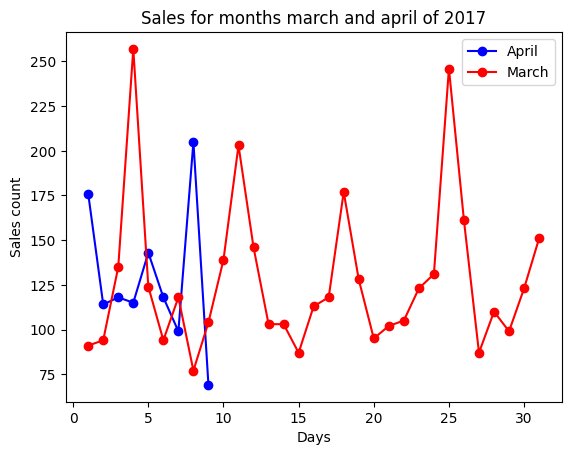

In [156]:
april_day_count=april[april['date_time'].dt.year==2017]['date_time'].dt.day.value_counts()
march_day_count=march[march['date_time'].dt.year==2017]['date_time'].dt.day.value_counts()
plt.plot(april_day_count.sort_index().index,april_day_count.sort_index().values,'bo-',label='April day wise sales')
plt.plot(march_day_count.sort_index().index,march_day_count.sort_index().values,'ro-',label='March day wise sales')
plt.title('Sales for months march and april of 2017')
plt.xlabel('Days')
plt.ylabel('Sales count')
plt.legend(['April','March'])

# It is evident from the above line plot that there was no sales records after 4th April in the year 2017 which could be a reason for sudden decrease in sales

Max dates in the every month for every year 2016 & 2017

In [158]:
data_with_dates=pd.DataFrame({'month':data['date_time'].dt.month,'year':data['date_time'].dt.year,'date':data['date_time'].dt.day,'item':data['Item']})
data_with_dates

,month,year,date,item
0,10,2016,30,Bread
1,10,2016,30,Scandinavian
2,10,2016,30,Scandinavian
3,10,2016,30,Hot chocolate
4,10,2016,30,Jam
...,...,...,...,...
20502,4,2017,9,Coffee
20503,4,2017,9,Tea
20504,4,2017,9,Coffee
20505,4,2017,9,Pastry


In [160]:
yearwise_month=data_with_dates.groupby(by=['year','month'])['item'].count()
num_records=data_with_dates.groupby(by=['year','month'])['date'].max()

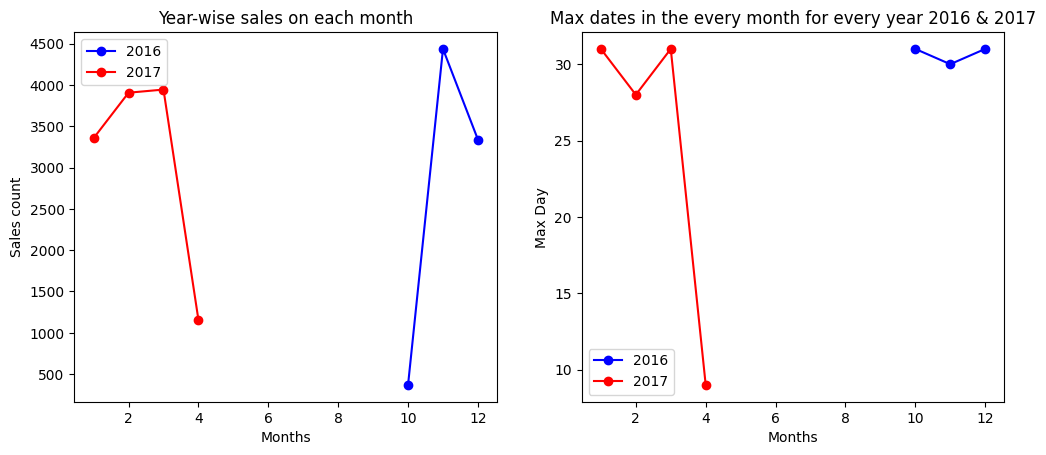

In [161]:
fig,ax=plt.subplots(nrows=1,ncols=2)
ax[0].plot(yearwise_month[2016].index,yearwise_month[2016].values,'bo-')
ax[0].plot(yearwise_month[2017].index,yearwise_month[2017].values,'ro-')
ax[0].set_xlabel('Months')
ax[0].set_ylabel('Sales count')
ax[0].legend(['2016','2017'])
ax[0].set_title('Year-wise sales on each month')
ax[1].plot(num_records[2016].index,num_records[2016].values,'bo-')
ax[1].plot(num_records[2017].index,num_records[2017].values,'ro-')
ax[1].set_xlabel('Months')
ax[1].set_ylabel('Max Day')
ax[1].legend(['2016','2017'])
ax[1].set_title('Max dates in the every month for every year 2016 & 2017')
fig.set_figwidth(12)

From the above line plot it is pretty evident that months with less no of distribution in dates have less sales. Fixing this data issue can give better analysis on the bakery sales

# X-mas and New year sales analysis

Obviously, from the above line plot we can see that in 2016 there was a good amount of sales happened b/w Christmas season of 2016 & New year 2017. So I'm considering this period as my analysis

Top10 product sold in high amount during these days?

In [164]:
new_year=data_with_dates.loc[(data_with_dates['year']==2017) & ((data_with_dates['month']==1)|(data_with_dates['month']==2))]
print("Total sales of New year is: ",new_year[['item']].count())

Total sales of New year is:  item    7262
dtype: int64


In [165]:
xmas=data_with_dates.loc[(data_with_dates['year']==2016) & ((data_with_dates['month']==11)|(data_with_dates['month']==12))]
print("Total sales of Xmas is: ",xmas[['item']].count())

Total sales of Xmas is:  item    7775
dtype: int64


In [167]:
new_year_items=new_year['item'].value_counts().reset_index(name='Count').rename(columns={"index":"Items"})[:10]
new_year_items

,item,Count
0,Coffee,1896
1,Bread,1172
2,Tea,527
3,Cake,449
4,Sandwich,296
5,Pastry,264
6,Hot chocolate,223
7,Cookies,219
8,Medialuna,193
9,Scone,155


In [168]:
xmas_items=xmas['item'].value_counts().reset_index(name='Count').rename(columns={"index":"Items"})[:10]
xmas_items

,item,Count
0,Coffee,2121
1,Bread,1337
2,Tea,546
3,Medialuna,349
4,Pastry,347
5,Cake,257
6,Hot chocolate,256
7,Sandwich,232
8,Brownie,191
9,Farm House,189


How much christmas or new year sales contributes to each year

In [175]:
items_per_year=data_with_dates.groupby(by='year')['item'].count()
print("New year of sales in 2017: ",(new_year[['item']].count()/items_per_year[2017])*100)
print("Christmas season of sales in 2016: ",(xmas[['item']].count()/items_per_year[2016])*100)

New year of sales in 2017:  item    58.739788
dtype: float64
Christmas season of sales in 2016:  item    95.469057
dtype: float64


# How was the sales at the beginning of the month and at the end of the month

As we already know that there are some months in the dataset doesn't have end of the month records, so we are ignoring those months for this analysis.

As we have concrete sales data for both month_start and month_end we are selecting 'Jan,Feb' month of 2017

In [177]:
end=data_with_dates.loc[(data_with_dates['date']>=25)].groupby(by='month')['item'].count()[0:2]

In [178]:
start=data_with_dates.loc[(data_with_dates['date']<=10)&(data_with_dates['month']<3)].groupby(by='month')['item'].count()

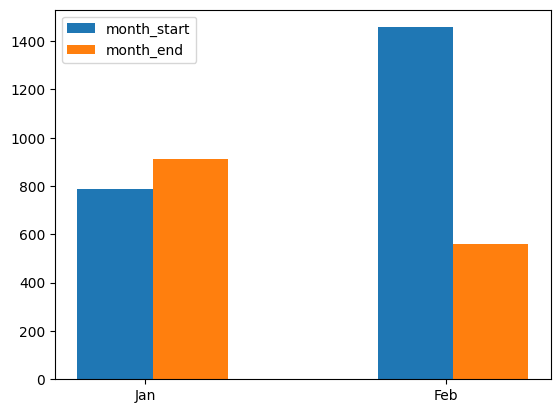

In [179]:
n=np.arange(0,2)
fig=plt.figure()
ax=fig.add_axes(111)
ax.bar(n,start,width=0.25)
ax.bar(n+0.25,end,width=0.25)
ax.set_xticks(n+0.1,labels=['Jan','Feb'])
ax.legend(['month_start','month_end'])

As per the analysis of the above graph, more transactions were done during month_end of Jan & Feb

# Frequent itemset analysis using Apriori Algorithm

In [180]:
from mlxtend.frequent_patterns import apriori,association_rules

Apriori can be implemented by two ways:
    1. using apyori module
    2. mlxtend library

We are using mlxtend library because the same pre-processed dataset can be used for Apriori and FP growth algorithm

In [181]:
data['Item']=data['Item'].str.strip()
data['Item']=data['Item'].str.lower()

# Data Preprocessing

Input dataset to the Apriori method should contain only boolean values. (i.e. if the item is present in the transaction then 1 else 0)

In [182]:
g=data.groupby(by=['Transaction','Item'])['Item'].count().reset_index(name='count')
g

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [184]:
pivot_t=g.pivot_table(index='Transaction',columns='Item',values='count',aggfunc='sum',fill_value=0)
pivot_t

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
def func(x):
    if(x<=0):
        return False
    if(x>0):
        return True
input_t=pd.DataFrame.map(pivot_t,func)
input_t

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Above resulting pivot table will help us to acheive the desired input boolean dataset which is required for Apriori algorithm/

In [189]:
itemsets=apriori(input_t,min_support=0.02,use_colnames=True)
#min-support=0.02 (means the frequent itemsets that are selected shold appear in atleast 20% of the transactions)

In [190]:
itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.327205,(bread)
2,0.040042,(brownie)
3,0.103856,(cake)
4,0.478394,(coffee)
5,0.054411,(cookies)
6,0.039197,(farm house)
7,0.058320,(hot chocolate)
8,0.038563,(juice)
9,0.061807,(medialuna)


# Association rule mining from the frequent itemsets

In [191]:
association_rules(itemsets,metric='confidence',min_threshold=0.3).loc[:,'antecedents':'lift']

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977
1,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515
2,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723
3,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311
4,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750
5,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878
6,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792
8,(tea),(coffee),0.142631,0.478394,0.049868,0.349630,0.730840
9,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431


The above association rule have lift values >1 which indicates that these rules are more releveant from the given dataset.

How interpret the above table??

Let's take first record: 0	(pastry)	(bread)	0.086107	0.327205	0.029160	0.338650	1.034977
If customer buys pastry then there is a confidence of 33% that he'll buys bread as well.

Apriori Algorithm suffers from few disadvantages:

1. For every iteration candidate table has to be generated.
2. For finding frequency of each itemset everytime whole database has to be scanned.


Summarization of sales on Grocery Dataset using pivot table

In [197]:
data_with_dates.pivot_table(index='item',columns=['year','month'],aggfunc='count',fill_value=0,margins=True,observed=True)

date                                           
year                     2016              2017                      All
month                      10    11    12     1     2     3     4       
item                                                                    
Adjustment                  0     1     0     0     0     0     0      1
Afternoon with the baker    0     0     0    15    13    14     2     44
Alfajores                   0   141    45    39   112     8    24    369
Argentina Night             0     0     0     0     0     2     5      7
Art Tray                    0    18     6     5     5     3     1     38
...                       ...   ...   ...   ...   ...   ...   ...    ...
Valentine's card            0     0     0     1    12     0     0     13
Vegan Feast                 0     0     0     0     3     6     7     16
Vegan mincepie              0     0    33    13     5     3     0     54
Victorian Sponge            3     4     0     0     0     0     0      7
All                       369  4436  3339  3356  3906  3944  1157  20507

[95 rows x 8 columns]